In [1]:
'''
https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/
https://pathmind.com/wiki/generative-adversarial-network-gan
https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29
MIT: https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=1

Python: https://heartbeat.fritz.ai/introduction-to-generative-adversarial-networks-gans-35ef44f21193
'''
import keras
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.core import Dense, Dropout
from keras.models import Model, Sequential
from keras import initializers
from keras.datasets import mnist
from keras.optimizers import Adam
from tqdm import tqdm

In [2]:
def load_mnist_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('image_generated_%d.png' % epoch)

'''
    - Get the training and testing data by loading it from Keras
    - Split the data into bath sizes of 128
    - Use tqdm to show the progress of the training
    - Get a random set of input images
    - Generate fake MNIST images
    - Train the discriminator
    - Train the generator
    - Plot the generated images
'''
def train(epochs=1, batch_size=128):
    x_train, y_train, x_test, y_test = load_mnist_data()
    batch_count = x_train.shape[0] / batch_size
    print('Batch count = ', batch_count)
    for e in range(1, epochs+1):
        print('-'*10, 'Epoch %d' % e, '-'*10)
        for _ in tqdm(range(int(batch_count))):
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)] 
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])
            y_dis = np.zeros(2*batch_size)
            y_dis[:batch_size] = 0.9
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)
    plot_generated_images(e, generator)

In [3]:
import numpy as np
np.random.seed(1000)
random_dim = 100

In [4]:
optimizer = Adam(learning_rate=0.0001, beta_1=0.5)
generator = Sequential()
generator.add(Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))

generator.add(Dense(512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=optimizer)

In [5]:
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)

In [6]:
'''
We want to train one network at a time, we set trainable to False. 
'''
discriminator.trainable = False
ganInput = Input(shape=(random_dim,))

'''
We declare the output of the generator, which will be an image. 
We get the output of the discriminator, which is the probability of the image being real or not. 
Since it’s a binary classification we use the binary_crossentropy loss function
'''
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

  0%|                                                                                                                                              | 0/468 [00:00<?, ?it/s]

Batch count =  468.75
---------- Epoch 1 ----------


  0%|▎                                                                                                                                     | 1/468 [00:00<00:59,  7.86it/s]

---------- Epoch 2 ----------


  0%|▎                                                                                                                                     | 1/468 [00:00<01:04,  7.20it/s]

---------- Epoch 3 ----------


  0%|▎                                                                                                                                     | 1/468 [00:00<01:11,  6.50it/s]

---------- Epoch 4 ----------


  0%|▎                                                                                                                                     | 1/468 [00:00<01:15,  6.15it/s]

---------- Epoch 5 ----------


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.03it/s]


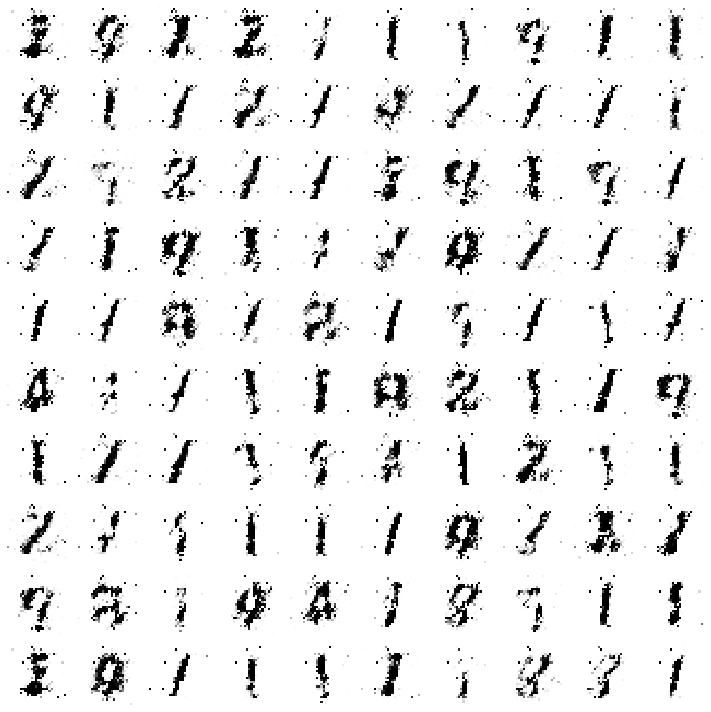

In [7]:
train(5, 128)